In [1]:
import pandas as pd
import ast
import functions.cluster as cluster
import importlib
import json

importlib.reload(cluster)

<module 'functions.cluster' from '/Users/chayapatr/Papers/uist-25/functions/cluster.py'>

In [2]:
# def filter_member(x):
#     m = ast.literal_eval(x)
#     # return every

merged_keys = pd.read_csv('data/graph/merged_keys.csv')
# merged_members = merged_keys['members'].apply(lambda x: filter_member(x)).tolist()
# merged_members = [ item for sublist in merged_members for item in sublist]
merged_members = []

for i, row in merged_keys.iterrows():
    m = ast.literal_eval(row['members'])
    merged_members += [item for item in m if item != row['representative']]

embeddings = pd.read_csv('data/embeddings/small.csv')
embeddings['embedding'] = embeddings['embedding'].apply(lambda x: ast.literal_eval(x))
embeddings = embeddings[~embeddings['key'].isin(['human', 'ai', 'co'])]
embeddings = embeddings[~embeddings['key'].isin(merged_members)]

feature = embeddings[embeddings['key'].apply(lambda x: len(x.split(">")) != 1)]
feature = feature.drop(columns=['embedding'])
feature['type'] = feature['key'].apply(lambda x: x.split(">")[0])
feature['cluster'] = feature['type']

embeddings = embeddings[embeddings['key'].apply(lambda x: len(x.split(">")) == 1)]

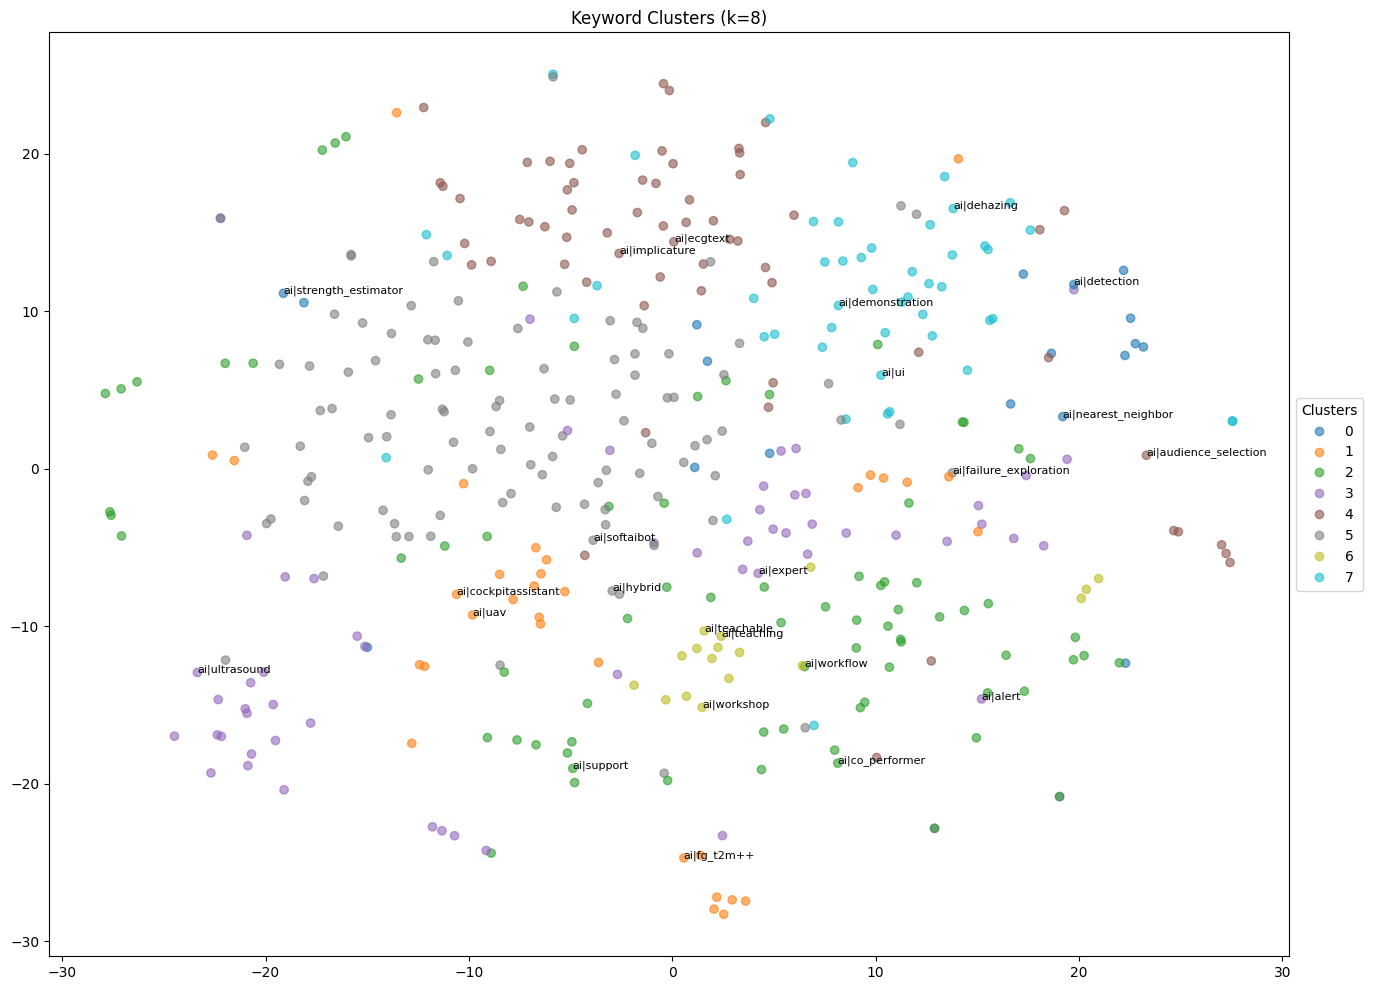


Top 15 representatives for each cluster:

Cluster 0:
- ai|machine_learning
- ai|classification
- ai|classifier
- ai|ml
- ai|prediction
- ai|detection
- ai|text_classification
- ai|keyword_spotting
- ai|interpretability
- ai|risk_detection
- ai|variance_based
- ai|segmentation
- ai|nearest_neighbor
- ai|lstm
- ai|recommendation

Cluster 1:
- ai|automated
- ai|autonomous
- ai|robotic
- ai|guided
- ai|gpt4
- ai|navigation
- ai|steering
- ai|gp_tsm
- ai|sensor
- ai|actuation
- ai|self_driving
- ai|control
- ai|human_sensor
- ai|service_robot
- ai|autochemplete

Cluster 2:
- ai|product
- ai|tool
- ai|app
- ai|application
- ai|platform
- ai|system
- ai|answer
- ai|agent
- ai|proposal
- ai|toolkit
- ai|client
- ai|database
- ai|plugin
- ai|partner
- ai|feedback

Cluster 3:
- ai|technology
- ai|expert
- ai|analysis
- ai|research
- ai|innovation
- ai|decision_aid
- ai|medical
- ai|medpalm2
- ai|intervention
- ai|sam
- ai|stepwise
- ai|med_palm2
- ai|newsdiscovery
- ai|bigdata
- ai|sensing

Clu

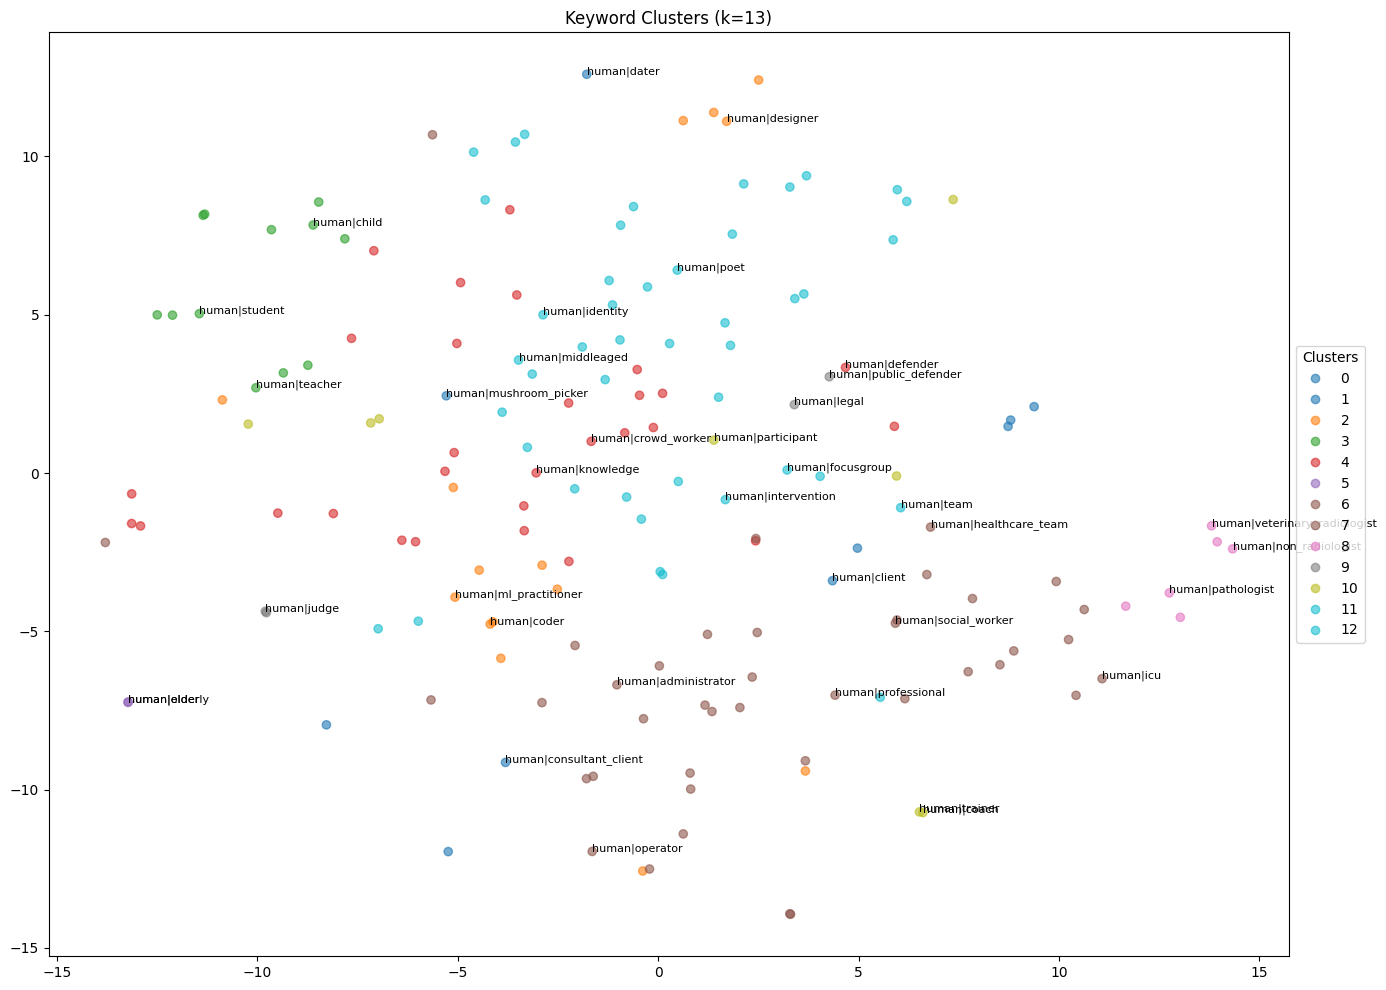


Top 15 representatives for each cluster:

Cluster 0:
- human|mushroom_picker

Cluster 1:
- human|client
- human|customer
- human|consumer
- human|partner
- human|buyer
- human|consultant_client
- human|dater
- human|bank
- human|follower/nonfollower

Cluster 2:
- human|coder
- human|novice_programmer
- human|domain_expert
- human|power_user
- human|ux
- human|level_designer
- human|end_user
- human|ml_practitioner
- human|nonexpert
- human|instructional_designer
- human|technical
- human|developer
- human|low_performing
- human|designer
- human|sounddesigner

Cluster 3:
- human|student
- human|learner
- human|young
- human|child
- human|teacher
- human|parent
- human|adolescent
- human|language_learner
- human|teenager
- human|undergraduate
- human|graduate
- human|preschooler

Cluster 4:
- human|us
- human|public
- human|layperson
- human|citizen
- human|user
- human|knowledge
- human|information_worker
- human|information
- human|social
- human|crowd_worker
- human|community
- human

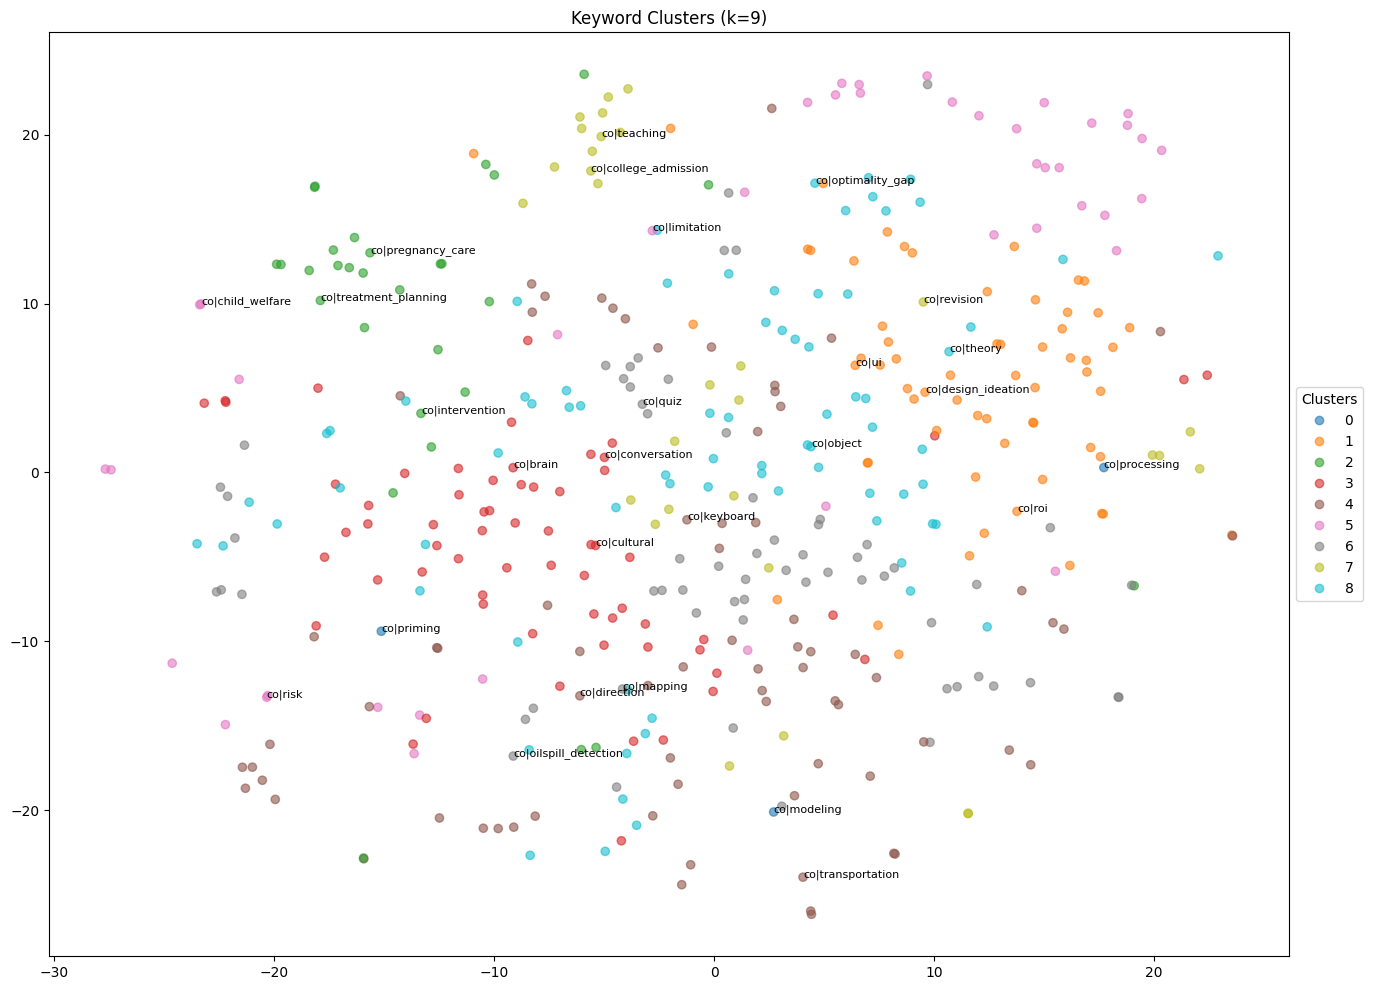


Top 15 representatives for each cluster:

Cluster 0:
- co|priming
- co|processing
- co|modeling

Cluster 1:
- co|company
- co|partner
- co|toolkit
- co|collaboration
- co|innovation
- co|design_ideation
- co|solution
- co|consulting
- co|digital_transformation
- co|strategy
- co|presentation
- co|ui_design
- co|tool
- co|usability
- co|ux

Cluster 2:
- co|medicine
- co|patient_care
- co|healthcare
- co|diagnostic
- co|triage
- co|treatment_planning
- co|clinical_decision_management
- co|intervention
- co|condition
- co|care_pathway
- co|radiology
- co|diagnosis
- co|therapy
- co|clinical_pathway
- co|pregnancy_care

Cluster 3:
- co|narrative_map
- co|conversation
- co|human
- co|mindmap
- co|sociocultural
- co|perspective
- co|feature
- co|attitude
- co|embodiment
- co|mental_model
- co|image
- co|cognitive_social
- co|social
- co|brainstorming
- co|trajectory

Cluster 4:
- co|news
- co|activity
- co|media
- co|task_switch
- co|video
- co|smart_speaker
- co|event
- co|support
- co|bou

In [3]:
embeddings['type'] = embeddings['key'].apply(lambda x: x.split("|")[0]).apply(lambda x: x.split(">")[0])

for t in embeddings['type'].unique():
    c, k, representatives = cluster.cluster_and_visualize(embeddings[embeddings['type'] == t])
    
    count = 0
    for i, row in embeddings[embeddings['type'] == t].iterrows():
        embeddings.at[i, 'cluster'] = f"{t}:{c[count]}"
        count += 1

In [4]:
embeddings.drop(columns=['embedding'], inplace=True)
pd.concat([embeddings, feature]).to_csv("data/graph/clustered_keys.csv", index=False)